<a href="https://colab.research.google.com/github/FaisalAhmed0/machine_learning_from_scratch/blob/main/Faisal_Mohamed_K_means_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook implements K means clustering algorithm and principal components analysis (PCA), using numpy.

# Imports and Data generation.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import make_classification

In [71]:
seed = 42

In [96]:
def generate_data(size):
  '''
  generate_data(size)
  This function generates synthetic data.
  size: number of examples in the dataset.
  return the dataset as a NumPy array.
  '''
  X, Y = datasets.make_classification(400, 3, 3, 0, n_classes=4, random_state=seed, n_clusters_per_class=1, class_sep=3)
  # plt.scatter(X[:, 0], X[:, 1])
  return X

In [97]:
# Generate data 
data = pd.DataFrame(generate_data(1000))

# K Means

In [98]:
# print first five rows in the data
data.head()

,0,1,2
0,2.831332,3.260916,3.233228
1,3.319735,-4.122222,3.790492
2,-2.731837,-3.251745,-3.499059
3,0.831602,4.084436,0.194126
4,-1.210477,-4.141630,-4.577587


In [99]:
# repeat
# 1. Initilize centroids
# 2. compute distances
# 3. Assign to each cluster its data point
# 4. update the centrioid

In [100]:
# 1. Initilize centroids
def initlialize_centroids(data, k):
  '''
  initlialize_centroids(data, k)
  This function initializes random centroids by choosing them randomly from the data.
  data: dataset as a pandas DataFrame.
  k: number of centroids.
  return the centroids as DataFrame.
  '''
  # np.random.seed(seed)
  # data size
  n = data.shape[0]
  # Pick random indices
  inds = np.random.choice(n, size=k, replace=False)
  # pick the centriods
  centriods = data.iloc[inds, :]
  return centriods

In [102]:
# pick three random centriods
k = 4
centriods = initlialize_centroids(data, k)
centriods
# plt.scatter(centriods.to_numpy()[:, 0], centriods.to_numpy()[:, 1])

,0,1,2
252,-3.352283,-4.643145,4.244378
394,2.721158,3.008508,2.644193
263,-1.482004,-1.828489,2.306818
52,-5.008926,-1.240799,-2.505173


In [103]:
# 2. compute distances
from collections import defaultdict

def compute_distnce(data, centroids):
  '''
  compute_distnce(data, centriods)
  This function computes the distance between each point and the centroids.
  data: dataset as a pandas DataFrame.
  centroids: cluster centroids.
  it returns a data frame that contains the point distance from each cluster at each point.
  '''
  K = centroids.shape[0]
  dis_df = pd.DataFrame(columns= [f"c{i}" for i in range(1, K+1)])
  for k in range(K):
    dis_df[f"c{k+1}"] = ((data - centroids.iloc[k, :])**2).sum(axis=1)
  return dis_df

In [104]:
dis_df = compute_distnce(data, centriods)
dis_df

,c1,c2,c3,c4
0,101.733696,0.422810,45.365146,114.664323
1,44.993187,52.519600,30.519193,117.304577
2,62.281758,106.665452,37.295949,10.216844
3,110.080089,10.730872,44.778917,69.756102
4,82.665919,118.736340,52.819393,27.137931
...,...,...,...,...
395,54.445357,37.124500,28.037916,105.101217
396,54.347533,41.689057,31.430212,115.936905
397,55.036186,118.375738,37.579447,10.878360
398,94.451204,0.866607,41.753824,114.958429


In [105]:
def assign_clusters(data, dis_df, centroids):
  '''
  assign_clusters(data, dis_df, centroids)
  This function assigns a point to each cluster based on the smallest distance to the cluster centroid.
  data: dataset as a pandas DataFrame.
  dis_df: data frame that contains the point distance from each cluster at each point.
  centroids: cluster centroids.
  returns a dictionary that contains the points in each cluster.
  '''
  K = centriods.shape[0]
  columns= [f"c{i}" for i in range(1, K+1)]
  d = {i: v for i, v in zip(range(K), columns)}
  argmin = dis_df.to_numpy().argmin(axis=1)
  clusters = {k:[] for k in columns}
  for i, dis in enumerate(dis_df.to_numpy()):
    min_ind = dis.argmin()
    # print(min_ind)
    point = data.iloc[i]
    cluster = d[min_ind]
    clusters[cluster].append(point.to_numpy())
  # print(clusters)
  return clusters

In [106]:
clu = assign_clusters(data, dis_df, centriods)

In [107]:
# 4. update the centrioid
def update_cnetriod(clusters, k, n):
  '''
  update_cnetriod(clusters, k, n).
  This function updates the values of the centroids after assigning each point to its corresponding cluster
  clusters: a dictionary that contains the points in each cluster.
  k: number of centroids.
  n: the shape of the data return the updated centroids as DataFrame.
  '''
  d = {}
  for i, cluster in enumerate(clusters):
    d[f"c{i+1}"] = np.mean(clusters[cluster], axis=0)
    # print(clusters[cluster])
    # print(d[f"c{i+1}"], len(clusters[cluster]))
  df = pd.DataFrame(d, columns=None).T
  df.columns = [i for i in range(n)]
  df.index = [i for i in range(k)]
  # print(df)
  return df

In [108]:
def K_means(data, iterations=1000, k=3, show_progress=False):
  '''
  K_means(data, iterations=1000, k=3, show_progress=False)
  This function implements K-means clustring algoithm.
  data: dataset as a pandas DataFrame.
  iterations: number of training iterations.
  k: number of clusters/centriods.
  show_progress: print the values of centriods after each iteration.
  '''
  centriods = initlialize_centroids(data, k)
  # print(centriods)
  n = data.shape[1]
  for i in range(iterations):
    dis_df = compute_distnce(data.copy(), centriods)
    # print(dis_df)
    # print(f"dis: {dis_df}")
    clusters = assign_clusters(data, dis_df, centriods)
    centriods = update_cnetriod(clusters, k, n)
    if show_progress:
      print(f"Iteration: {i+1}")
      print(centriods.to_numpy())
  return centriods, clusters

In [109]:
# run K-means algorithm 
final_centriods, _ = K_means(data, 10, 4, False)

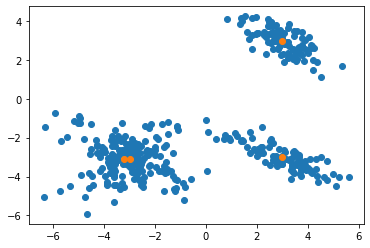

In [110]:
# plot the results for the first two dimensions
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.scatter(final_centriods.iloc[:, 0], final_centriods.iloc[:, 1])

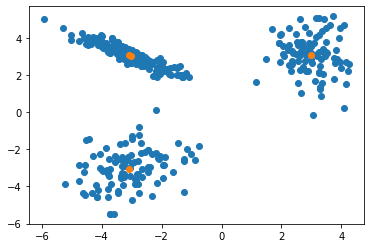

In [112]:
# plot the results for the second two dimensions
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
plt.scatter(final_centriods.iloc[:, 1], final_centriods.iloc[:, 2])

# PCA

In [114]:
# PCA
# 1. Standarize your data
# 2. Compute the covariance matrix
# 3. Perform eigen decemposition to extract the k principle components 

In [113]:
data = data.copy()

In [115]:
# 1. Standarize your data
def standardize_data(data):
  return (data - data.mean()) / data.std()

In [116]:
# 2. Compute the covariance matrix
def cov_matrix(data):
  return data.to_numpy().T @ data.to_numpy()

In [117]:
# 3. Perform eigen decemposition to extract the k principle components 
def eig_decomp(m):
  e, v = np.linalg.eig(m)
  return e, v

In [120]:
def PCA(data, rank):
  '''
  PCA(data, rank)
  This function implements PCA using Eigendecomposition.
  return the prjection matrix and the eigenvalues
  '''
  # data_stand = standardize_data(data)
  cov = cov_matrix(data)
  e, v = eig_decomp(cov)
  P = v[:, :rank]
  return P, e

In [121]:
def PCA_SVD(data, rank):
  '''
  PCA(data, rank)
  This function implements PCA using Singular Value Decomposition (SVD).
  return the prjection matrix.
  '''
  U, D, V = np.linalg.svd(data)
  P = V[:,:rank]
  return P

In [122]:
P = PCA_SVD(data, 2)

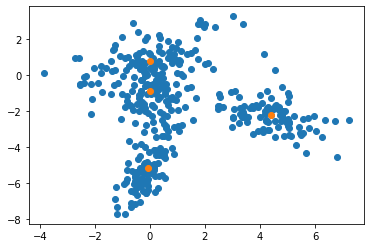

In [123]:
# Using the first two principal components, we will plot the projected data and the centriods from the previous section
data_proj = data.to_numpy() @ P
centriods_proj = final_centriods.to_numpy() @ P
plt.scatter(data_proj[:, 0], data_proj[:, 1])
plt.scatter(centriods_proj[:, 0], centriods_proj[:, 1])

In [125]:
P = PCA(data, 2)
print(P[0])
data.shape

[[-0.69228205  0.72158927]
 [ 0.51006821  0.48206482]
 [ 0.51046643  0.4969129 ]]


(400, 3)

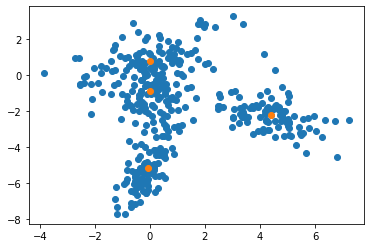

In [126]:
plt.scatter(data_proj[:, 0], data_proj[:, 1])
plt.scatter(centriods_proj[:, 0], centriods_proj[:, 1])

In [134]:
P, _ = PCA(data, 4)

In [135]:
# Now we will take the first three principal components, and plot the projected data and the centriods from the previous section
data_proj_3d = data.to_numpy() @ P
centriods_proj_3d = final_centriods.to_numpy() @ P

In [136]:
centriods_proj_3d

array([[ 2.20069047, -2.2870691 ,  4.37486383],
       [ 1.03010593,  5.12276907,  0.02633727],
       [-2.04502912,  2.19068235,  4.25753833],
       [-1.08381011, -5.1439943 ,  0.0823606 ]])

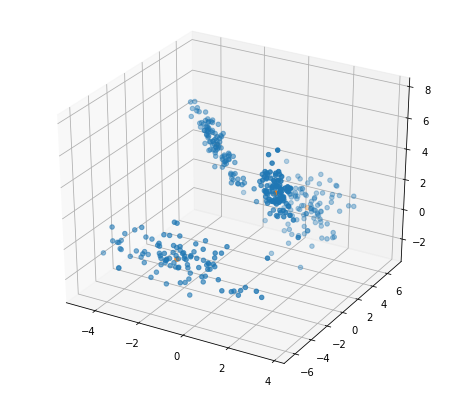

In [137]:
fig = plt.figure(figsize = (8, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_proj_3d[:, 0], data_proj_3d[:, 1], data_proj_3d[:, 2])
ax.scatter3D(centriods_proj_3d[:, 0], centriods_proj_3d[:, 1], centriods_proj_3d[:, 2])